# Minimum Variance Beamformer

参考论文：https://www.researchgate.net/publication/6135459_Adaptive_Beamforming_Applied_to_Medical_Ultrasound_Imaging

### 1. 生成钟组随机数据

##### (1) 基础仿真数据的生成

$ y(t)=[a + \epsilon{_1} * GN{_1}(\mu_1,\sigma_1)] + [b + \epsilon{_2} * GN{_2}(\mu_2,\sigma_2)] * t $

$ GN_{1} $ 代表钟在频率a上的噪声，$ GN_{2} $ 代表钟在频率漂移b上的噪声

$ a = μ_1 = μ_2 = 0, b = 10^{-15}, σ_1 = 2 × 10^{-30}, σ_2 = 10^{-34}, t = 1, 2, 3... $

In [1]:
a = 0
b = 10 ** (-15)
epsilon_1 = 1.0
epsilon_2 = 0.1
mu_1 = 0
mu_2 = 0
sigma_1 = 2 * 10 ** (-30)
sigma_2 = 10 ** (-34)

t = range(1,11) # 1,2,3...10
clock_size = 5

In [2]:
import math
import numpy as np
frequency = a + epsilon_1 * np.random.normal(loc=mu_1, scale=math.sqrt(sigma_1), size=(len(t), clock_size))
frequency_drift = b + epsilon_2 * np.random.normal(loc=mu_2, scale=math.sqrt(sigma_2), size=(len(t), clock_size))

In [3]:
y_t = frequency + np.array(t).reshape((-1,1)) * frequency_drift
print(y_t)

[[ 1.13607867e-16  2.85127399e-15  2.00357276e-15  2.47064362e-15
  -1.00948029e-16]
 [ 3.00471965e-15  3.45232874e-16  2.30125798e-15  5.76787911e-16
   1.91391554e-15]
 [ 5.67020053e-15  3.09066683e-15  2.08928865e-15  1.79438610e-15
   4.39262646e-15]
 [ 3.57281782e-15  4.07027174e-15  4.11045674e-15  2.57151830e-15
   3.53217695e-15]
 [ 4.05826594e-15  3.85941802e-15  7.00449668e-15  9.22312425e-15
   5.32450404e-15]
 [ 6.68709428e-15  4.78493557e-15  4.19771565e-15  5.98542451e-15
   3.93480450e-15]
 [ 7.21602583e-15  8.96514731e-15  7.44220738e-15  6.58733488e-15
   5.33517740e-15]
 [ 8.85727659e-15  6.09643905e-15  8.33618135e-15  5.90588129e-15
   7.41023483e-15]
 [ 7.14592870e-15  8.17108354e-15  9.11095013e-15  1.04055817e-14
   7.97825972e-15]
 [ 1.07580756e-14  9.53401032e-15  8.86062522e-15  9.36873897e-15
   1.00964980e-14]]


##### (2) 添加相关性扰动

$ y_{i}(t) = y_{i}(t) + \beta GN_{s}, -1 < \beta < 1 $

$ GN_{s} $ 代表环境产生的噪声。β表示相关性的大小，用它来控制钟之间的相关性

In [4]:
beta_range = 1.0
beta_fix = True
mu_s = 0
sigma_s = 10 ** (-30)

if beta_fix:
    beta = beta_range * np.ones((1, clock_size))
else:
    beta = np.random.uniform(-beta_range, beta_range, clock_size)
noice_global = np.random.normal(loc=mu_s, scale=math.sqrt(sigma_s), size=(len(t), 1))

print(beta)
print(noice_global)

[[1. 1. 1. 1. 1.]]
[[-1.71136137e-15]
 [ 6.92029888e-16]
 [-1.03394293e-15]
 [ 1.65645560e-15]
 [-8.28774731e-16]
 [ 9.37734483e-16]
 [ 1.00168116e-15]
 [ 2.16446681e-16]
 [-3.50530258e-17]
 [-2.74499449e-15]]


In [5]:
y_t = y_t + noice_global * beta
print(y_t)

[[-1.59775350e-15  1.13991262e-15  2.92211389e-16  7.59282253e-16
  -1.81230940e-15]
 [ 3.69674954e-15  1.03726276e-15  2.99328787e-15  1.26881780e-15
   2.60594543e-15]
 [ 4.63625760e-15  2.05672390e-15  1.05534571e-15  7.60443163e-16
   3.35868353e-15]
 [ 5.22927343e-15  5.72672734e-15  5.76691235e-15  4.22797390e-15
   5.18863256e-15]
 [ 3.22949121e-15  3.03064329e-15  6.17572195e-15  8.39434952e-15
   4.49572931e-15]
 [ 7.62482876e-15  5.72267005e-15  5.13545014e-15  6.92315899e-15
   4.87253898e-15]
 [ 8.21770699e-15  9.96682847e-15  8.44388854e-15  7.58901605e-15
   6.33685856e-15]
 [ 9.07372327e-15  6.31288573e-15  8.55262803e-15  6.12232797e-15
   7.62668151e-15]
 [ 7.11087567e-15  8.13603052e-15  9.07589711e-15  1.03705286e-14
   7.94320670e-15]
 [ 8.01308114e-15  6.78901583e-15  6.11563073e-15  6.62374447e-15
   7.35150347e-15]]


##### (3) 可视化各台钟的数据

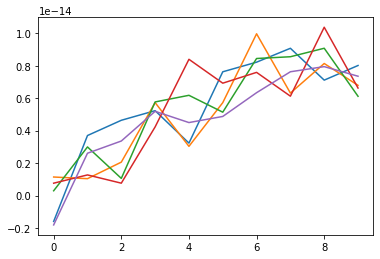

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(facecolor='white')
plt.plot(y_t)
plt.show()

### 2. 安装Allan Variance组件包

In [7]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


### 3. 生成子钟组

In [8]:
subset_size = 3
subsets = list()
if subset_size > y_t.shape[1]:
    raise Exception('The subset size should not be greater than the number of clocks')
for i in range(y_t.shape[1] - subset_size + 1):
    subset = y_t[:,i:i+subset_size]
    subsets.append(subset)
print(subsets)

[array([[-1.59775350e-15,  1.13991262e-15,  2.92211389e-16],
       [ 3.69674954e-15,  1.03726276e-15,  2.99328787e-15],
       [ 4.63625760e-15,  2.05672390e-15,  1.05534571e-15],
       [ 5.22927343e-15,  5.72672734e-15,  5.76691235e-15],
       [ 3.22949121e-15,  3.03064329e-15,  6.17572195e-15],
       [ 7.62482876e-15,  5.72267005e-15,  5.13545014e-15],
       [ 8.21770699e-15,  9.96682847e-15,  8.44388854e-15],
       [ 9.07372327e-15,  6.31288573e-15,  8.55262803e-15],
       [ 7.11087567e-15,  8.13603052e-15,  9.07589711e-15],
       [ 8.01308114e-15,  6.78901583e-15,  6.11563073e-15]]), array([[1.13991262e-15, 2.92211389e-16, 7.59282253e-16],
       [1.03726276e-15, 2.99328787e-15, 1.26881780e-15],
       [2.05672390e-15, 1.05534571e-15, 7.60443163e-16],
       [5.72672734e-15, 5.76691235e-15, 4.22797390e-15],
       [3.03064329e-15, 6.17572195e-15, 8.39434952e-15],
       [5.72267005e-15, 5.13545014e-15, 6.92315899e-15],
       [9.96682847e-15, 8.44388854e-15, 7.58901605e-15]

### 4. 在滑动窗口内计算协方差矩阵，并计算各子钟组权重

------------------Step 0------------------
*** Raw sum ***
[-1.65629488e-16  7.72730017e-15  7.74832721e-15  1.67229131e-14
  1.24358565e-14]
*** Raw sum ***
[2.19140627e-15 5.29936843e-15 3.87251278e-15 1.57216136e-14
 1.76007148e-14]
*** Raw sum ***
[-7.60815754e-16  6.86805110e-15  5.17447240e-15  1.51835188e-14
  1.90658008e-14]
*** Cov mean ***
[[1.32156057e-29 1.29133861e-29 1.49467921e-29]
 [1.29133861e-29 1.71229470e-29 1.85110021e-29]
 [1.49467921e-29 1.85110021e-29 2.11627703e-29]]
*** Corr ***
[[1.         0.85843486 0.89375441]
 [0.85843486 1.         0.97242119]
 [0.89375441 0.97242119 1.        ]]
*** Regularization term ***
[[4.23255406e-31 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.23255406e-31 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.23255406e-31]]
*** Inverse Cov mean ***
[[ 3.04527507e+29 -1.74520332e+28 -1.95897789e+29]
 [-1.74520332e+28  5.99024246e+29 -5.01606331e+29]
 [-1.95897789e+29 -5.01606331e+29  6.12121913e+29]]
*** Weight ***
[[ 1.06315577]

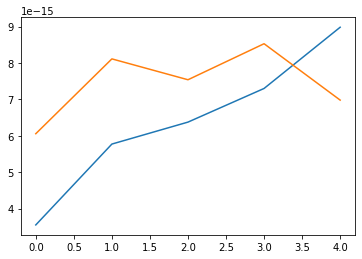

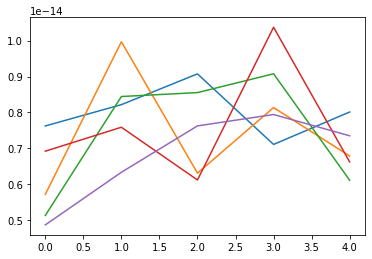

*** Weighted clock's Allan Variance ***
taus - [1.], adevs - [7.40877973e-16]
*** Mean clock's Allan Variance ***
taus - [1.], adevs - [1.62244988e-15]
*** Inverse variance weighted clock's Allan Variance ***
taus - [1.], adevs - [1.09244319e-15]
*** Each clock's Allan Variance ***
taus - [1.], adevs - [1.64437244e-15]
taus - [1.], adevs - [4.13175509e-15]
taus - [1.], adevs - [1.93842407e-15]
taus - [1.], adevs - [4.10543309e-15]
taus - [1.], adevs - [5.48123535e-16]


In [9]:
regularization = True
window_size = 5
window_step = 1
A = np.ones((clock_size - subset_size + 1, 1))

if window_size > y_t.shape[0]:
    raise Exception('The window size should not be greater than the number of time points')

    
weighted_clock_estimation = list()
weighted_inverse_variance_estimation = list()
for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
    subset_raw_sum_list = list()
    print("------------------Step %s------------------" % i)
    for j in range(len(subsets)):
        # 1. Get raw subset
        subset_raw = subsets[j][i:i+window_size,]
        
        # 2. Calculate summation within a subset 
        subset_raw_sum = np.sum(subset_raw, axis=1)
        subset_raw_sum_list.append(subset_raw_sum)
        print("*** Raw sum ***")
        print(subset_raw_sum)
   
    # 3. Calculate covariance matrix mean (Element-wise)
    print("*** Cov mean ***")
    allset_cov_mean = np.cov(np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1)
    print(allset_cov_mean)
    print("*** Corr ***")
    allset_corr_mean = np.corrcoef(np.asarray(subset_raw_sum_list))
    print(allset_corr_mean)
    
    # 4. Add regularization term
    if regularization:
        print("*** Regularization term ***")
        sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
        print(sigma * np.eye(clock_size - subset_size + 1))
        allset_cov_mean += sigma * np.eye(clock_size - subset_size + 1)
    
    
    # 5. Calculate the inverse of covariance matrix mean
    print("*** Inverse Cov mean ***")
    allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
    print(allset_cov_mean_inverse)
    
    # 6. Calculate weight
    print("*** Weight ***")
    weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
    print(weight)

    # 7. Calculate beamformer weighted clock
    print("*** Weighted output ***")
    Z = (np.dot(weight.T, np.asarray(subset_raw_sum_list)) / (clock_size - subset_size + 1))[0]
    print(Z)
    
    # 8. Select the last element in Z as the estimation of weighted clock
    weighted_clock_estimation.append(Z[-1])
    
    # 9. Calculate allan variance for each clock
    inverse_variance = list()
    clock_last_row = list()
    for k in range(clock_size):
        clock = y_t[window_step * i:window_step * i + window_size + 1, k]
        (taus, adevs, errors, ns) = allantools.adev(clock)
        inverse_variance.append(1.0 / adevs[0])
        clock_last_row.append(clock[-1])
    inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
    print("*** Inverse variance weight ***")
    print(inverse_variance)
    
    # 10. Calculate the inverse variance weighted clock
    weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
    print("*** Inverse variance weighted clock ***")
    print(weighted_inverse_variance_clock)
    weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
    
# 11. Visualize weighted clock estimation and each clock
print("------------------Overall------------------")
print("*** Weighted clock estimation ***")
weighted_clock_estimation = weighted_clock_estimation[:-1]
print(weighted_clock_estimation)

print("*** Inverse variance weighted clock estimation ***")
weighted_inverse_variance_estimation = weighted_inverse_variance_estimation[:-1]
print(weighted_inverse_variance_estimation)

real_clock = y_t[-int((y_t.shape[0] - window_size) / window_step):,]
real_clock_mean = np.mean(real_clock, axis=1)
print("*** Mean clock estimation ***")
print(real_clock_mean)

print("*** Clock covariance matrix ***")
print(np.cov(real_clock.T))

print("*** Clock corr matrix ***")
print(np.corrcoef(real_clock.T))

fig = plt.figure(facecolor='white')
plt.plot(weighted_clock_estimation)
plt.plot(real_clock_mean)
plt.show()

fig = plt.figure(facecolor='white')
plt.plot(real_clock)
plt.show()

# 12. Calculate Allan variance
print("*** Weighted clock's Allan Variance ***")
(taus, adevs, errors, ns) = allantools.adev(weighted_clock_estimation)
print('taus - %s, adevs - %s' % (taus, adevs))

print("*** Mean clock's Allan Variance ***")
(taus, adevs, errors, ns) = allantools.adev(real_clock_mean)
print('taus - %s, adevs - %s' % (taus, adevs))

print("*** Inverse variance weighted clock's Allan Variance ***")
(taus, adevs, errors, ns) = allantools.adev(weighted_inverse_variance_estimation)
print('taus - %s, adevs - %s' % (taus, adevs))

print("*** Each clock's Allan Variance ***")
for i in range(real_clock.shape[1]):
    (taus, adevs, errors, ns) = allantools.adev(real_clock[:,i])
    print('taus - %s, adevs - %s' % (taus, adevs))

### 计算R(n)的估计
$ \hat{R}(n)=\frac{1}{(2K+1)(M-L+1)}\sum_{k=-K}^K\sum_{l=0}^{M-L}\bar{X_l}(n-k)\bar{X_l}(n-k)^{H} $